In [1]:
import numpy as np
import cvxpy as cvx
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

## Оптимизация при заданных ограничениях

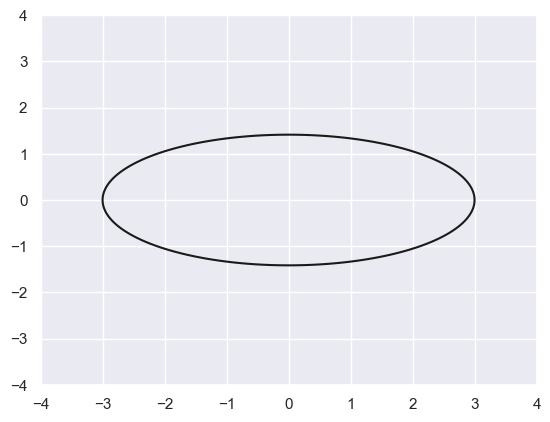

In [2]:
xlist = np.linspace(-4.0, 4.0, 200)
ylist = np.linspace(-4.0, 4.0, 200)
X, Y = np.meshgrid(xlist, ylist)
F = X**2 / 9 + Y**2 / 2 - 1
fig, ax = plt.subplots()
ax.contour(X, Y, F, [0], colors='k', linestyles='solid')

In [3]:
x = cvx.Variable(1)
y = cvx.Variable(1)

constraints = [x**2 / 9 + y**2 / 2 <= 1]
obj = cvx.Maximize(3 * x + 4 * y)

prob = cvx.Problem(obj, constraints)
prob.solve()

10.630145734947655

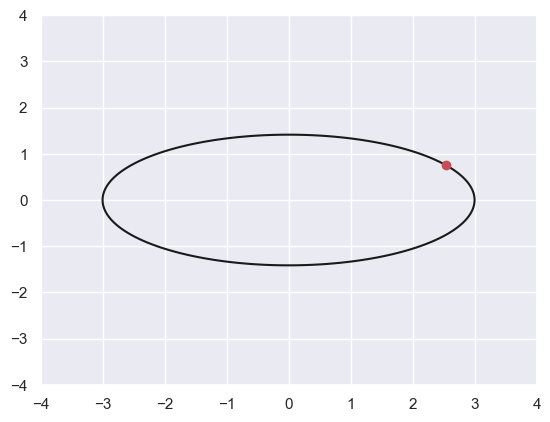

In [4]:
ax.plot(x.value, y.value, 'ro')
fig

## Оптимизация площади покрытия связи при заданном местоположении абонентов

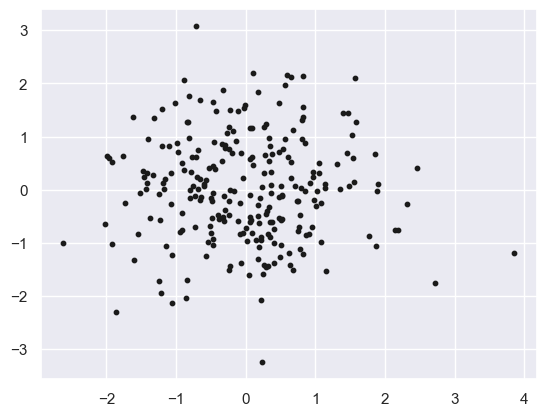

In [5]:
clients_count = 250
task_dim = 2

random_state = 42
np.random.seed(random_state)
X = np.random.randn(task_dim, clients_count)

fig, ax = plt.subplots()
ax.scatter(X[0, :], X[1, :], s=10, color='k')

In [6]:
A = cvx.Variable((task_dim, task_dim), PSD=True)
b = cvx.Variable((task_dim, ))

prob = cvx.Problem(cvx.Minimize(-cvx.log_det(A)), [cvx.norm(A @ X[:, i] + b) <= 1 for i in range(clients_count)])

prob.solve(verbose=True)

                                     CVXPY                                     
                                     v1.3.0                                    
(CVXPY) Jan 15 07:21:24 PM: Your problem has 6 variables, 250 constraints, and 0 parameters.
(CVXPY) Jan 15 07:21:24 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 15 07:21:24 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 15 07:21:24 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Jan 15 07:21:24 PM: Compiling problem (target solver=SCS).
(CVXPY) Jan 15 07:21:24 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing ->

2.42983722304747

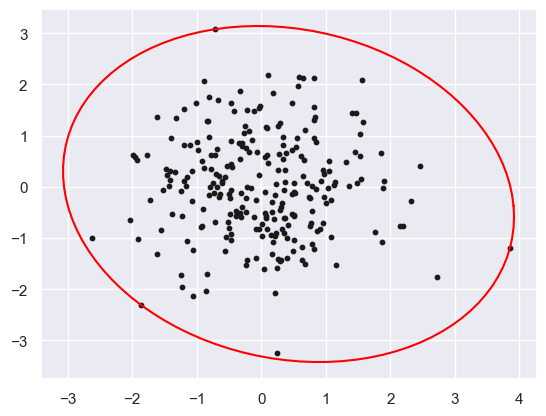

In [7]:
phi = np.linspace(0, 2 * np.pi, 100)
optimal_ellipse = np.vstack((np.cos(phi) - b.value[0], np.sin(phi) - b.value[1]))
optimal_ellipse = np.linalg.solve(A.value, optimal_ellipse)
ax.plot(optimal_ellipse[0, :], optimal_ellipse[1, :], color='red')
fig